In [7]:
%matplotlib inline

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
from functools import reduce

In [8]:
term_sites=pd.read_csv('3end_rho_terminators.csv',index_col=0)

FileNotFoundError: [Errno 2] File b'3end_rho_terminators.csv' does not exist: b'3end_rho_terminators.csv'

In [5]:
d=75
u=250
mask_1=(term_sites['Gene strand']== '+')
mask_2=(term_sites['Gene strand']== '-')
term_sites['win1']=0
term_sites['win2']=0
term_sites.loc[mask_1,'win1'] = term_sites['term_MG1655_position'] - u
term_sites.loc[mask_2,'win2'] = term_sites['term_MG1655_position'] + u
term_sites.loc[mask_1,'win2'] = term_sites['term_MG1655_position'] + d
term_sites.loc[mask_2,'win1'] = term_sites['term_MG1655_position'] - d

NameError: name 'term_sites' is not defined

In [152]:
term_sites=term_sites.loc[:,['Gene name','win1','win2']]

In [153]:
term_site_coord=term_sites.set_index('Gene name').T.to_dict('list')

In [2]:
p_data=pd.read_csv('2020-06-25_CPDseq/p_data_df',index_col=0).to_dict()
m_data=pd.read_csv('2020-06-25_CPDseq/m_data_df',index_col=0).to_dict()

In [11]:
def select_reg(d,coord):
    gene_dict={}
    for i in range(coord[0],coord[1]):
        if i in d:
            gene_dict[i]=d[i] 
        else:
            gene_dict[i]=0
    return gene_dict

def get_win(d,coord):
    win_df={}
    for sample in d:
        df1=d[sample]
        reg=select_reg(df1,coord)
        win_df[sample]=reg
    return win_df

def make_final_df(coord,d):
    final_df={}
   
        #coord=gene_df[gene]
    win_reg=get_win(d,coord)
    #final_df[gene]=win_reg
    return win_reg
    


In [12]:
m_final=make_final_df([2372892,2373278],m_data)
p_final=make_final_df([2372892,2373278],p_data)

In [13]:
m_final

{'bm01': {2372892: 0,
  2372893: 0,
  2372894: 0,
  2372895: 0,
  2372896: 0,
  2372897: 0,
  2372898: 0,
  2372899: 0,
  2372900: 0,
  2372901: 0,
  2372902: 0,
  2372903: 0,
  2372904: 0,
  2372905: 0,
  2372906: 0,
  2372907: 0,
  2372908: 0,
  2372909: 0.0,
  2372910: 0,
  2372911: 0,
  2372912: 1.0,
  2372913: 0,
  2372914: 0,
  2372915: 0,
  2372916: 0,
  2372917: 0,
  2372918: 0,
  2372919: 0,
  2372920: 0,
  2372921: 0,
  2372922: 1.0,
  2372923: 0,
  2372924: 0,
  2372925: 4.0,
  2372926: 0,
  2372927: 0,
  2372928: 0,
  2372929: 0,
  2372930: 0,
  2372931: 0,
  2372932: 0,
  2372933: 0,
  2372934: 1.0,
  2372935: 0,
  2372936: 0,
  2372937: 0,
  2372938: 0,
  2372939: 0,
  2372940: 0,
  2372941: 0,
  2372942: 2.0,
  2372943: 0,
  2372944: 0,
  2372945: 0,
  2372946: 0,
  2372947: 0,
  2372948: 0,
  2372949: 0,
  2372950: 0,
  2372951: 0,
  2372952: 0,
  2372953: 2.0,
  2372954: 0.0,
  2372955: 1.0,
  2372956: 0,
  2372957: 0,
  2372958: 0,
  2372959: 0,
  2372960: 0,
  237296

In [65]:
sum(p_final['guaC']['bm22'].values())

84.0

In [14]:
p_temp=pd.DataFrame.from_dict(p_final, orient='index')
m_temp=pd.DataFrame.from_dict(m_final, orient='index')

In [15]:
p_flip=p_temp.to_dict()
m_flip=m_temp.to_dict()   

In [105]:
def create_sample_lis(samples):
    sample_lis={}
    for sample in samples:
        sample_file=open(sample+'_R2.log','r')
        line1=sample_file.readline()
        line2=sample_file.readline().split()
        read_num=int(line2[8])
        read_num
        sample_lis[sample]=read_num
        sample_file.close()
    return sample_lis

In [106]:
#get number of aligned reads from each sample's bowtie log file and create a dictionary used for normalization
samples=['bm01','bm02','bm03','bm04','bm05','bm06','bm07','bm08','bm09','bm10','bm11','bm12','bm13','bm14','bm15','bm16','bm17','bm18','bm19','bm20','bm21','bm22','bm23','bm24']
sample_lis=create_sample_lis(samples)

In [107]:
sample_lis

{'bm01': 10550778,
 'bm02': 13942795,
 'bm03': 9990156,
 'bm04': 10348974,
 'bm05': 10276799,
 'bm06': 12045684,
 'bm07': 10924386,
 'bm08': 11686969,
 'bm09': 13481411,
 'bm10': 11428456,
 'bm11': 13699040,
 'bm12': 13340527,
 'bm13': 9798333,
 'bm14': 12374160,
 'bm15': 10236690,
 'bm16': 9797635,
 'bm17': 10094414,
 'bm18': 12879623,
 'bm19': 10545122,
 'bm20': 10916186,
 'bm21': 12943182,
 'bm22': 11125443,
 'bm23': 10742795,
 'bm24': 11085302}

In [185]:
p_flip[s][gene]

{262572: 0,
 262573: 0,
 262574: 3.0,
 262575: 0,
 262576: 0,
 262577: 0,
 262578: 0,
 262579: 0,
 262580: 0,
 262581: 0,
 262582: 0,
 262583: 0,
 262584: 0,
 262585: 0,
 262586: 0,
 262587: 0,
 262588: 0,
 262589: 0,
 262590: 0,
 262591: 0,
 262592: 0,
 262593: 0,
 262594: 0,
 262595: 0,
 262596: 0,
 262597: 0,
 262598: 0,
 262599: 0,
 262600: 0.0,
 262601: 0,
 262602: 0,
 262603: 0,
 262604: 0,
 262605: 0,
 262606: 0,
 262607: 0,
 262608: 0,
 262609: 0,
 262610: 0,
 262611: 0,
 262612: 0,
 262613: 0,
 262614: 0,
 262615: 0,
 262616: 0,
 262617: 0,
 262618: 0,
 262619: 0,
 262620: 0,
 262621: 0,
 262622: 0,
 262623: 0,
 262624: 0,
 262625: 0,
 262626: 0,
 262627: 0,
 262628: 0,
 262629: 0,
 262630: 0,
 262631: 0,
 262632: 0,
 262633: 0,
 262634: 0,
 262635: 0,
 262636: 0,
 262637: 0,
 262638: 0,
 262639: 0,
 262640: 0,
 262641: 0,
 262642: 0,
 262643: 0,
 262644: 0,
 262645: 0,
 262646: 0,
 262647: 0,
 262648: 0,
 262649: 2.0,
 262650: 0,
 262651: 0,
 262652: 0,
 262653: 0,
 262654: 0

In [187]:
p_flip[s][gene]

{262572: 0,
 262573: 0,
 262574: 5.0,
 262575: 0,
 262576: 0,
 262577: 0,
 262578: 0,
 262579: 0,
 262580: 0,
 262581: 0,
 262582: 0,
 262583: 0,
 262584: 0,
 262585: 0,
 262586: 0,
 262587: 0,
 262588: 0,
 262589: 0,
 262590: 0,
 262591: 0,
 262592: 0,
 262593: 0,
 262594: 0,
 262595: 0,
 262596: 0,
 262597: 0,
 262598: 0,
 262599: 0,
 262600: 5.0,
 262601: 0,
 262602: 0,
 262603: 0,
 262604: 0,
 262605: 0,
 262606: 0,
 262607: 0,
 262608: 0,
 262609: 0,
 262610: 0,
 262611: 0,
 262612: 0,
 262613: 0,
 262614: 0,
 262615: 0,
 262616: 0,
 262617: 0,
 262618: 0,
 262619: 0,
 262620: 0,
 262621: 0,
 262622: 0,
 262623: 0,
 262624: 0,
 262625: 0,
 262626: 0,
 262627: 0,
 262628: 0,
 262629: 0,
 262630: 0,
 262631: 0,
 262632: 0,
 262633: 0,
 262634: 0,
 262635: 0,
 262636: 0,
 262637: 0,
 262638: 0,
 262639: 0,
 262640: 0,
 262641: 0,
 262642: 0,
 262643: 0,
 262644: 0,
 262645: 0,
 262646: 0,
 262647: 0,
 262648: 0,
 262649: 6.0,
 262650: 0,
 262651: 0,
 262652: 0,
 262653: 0,
 262654: 0

In [197]:
s='bm02'
gene='panD'
s_plot=np.array(list(p_flip[s][gene].values()))/(sample_lis[s]/1000000)

(0.0, 0.8)

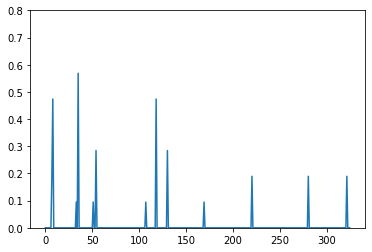

In [196]:
plt.plot(s_plot)
plt.ylim(0,0.8)

(0.0, 0.8)

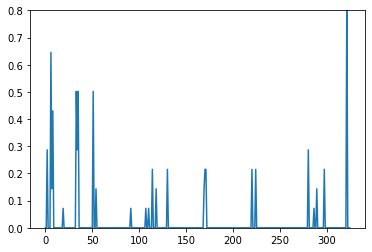

In [198]:
plt.plot(s_plot)
plt.ylim(0,0.8)

(0.0, 0.1)

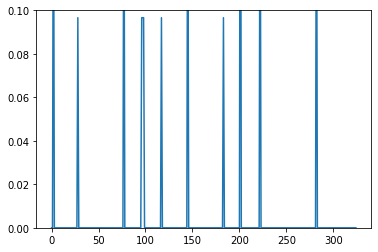

In [194]:
plt.plot(s_plot)
plt.ylim(0,0.1)

(0.0, 0.8)

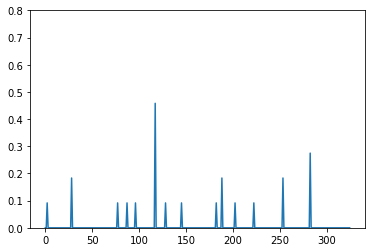

In [182]:
plt.plot(s_plot)
plt.ylim(0,0.8)

In [154]:
term_sites

,Gene name,win1,win2
0,talB,8980,9305
1,guaC,114276,114601
2,nadC,117635,117960
3,panD,146201,146526
4,panC,147831,148156
...,...,...,...
139,yjjA,4599572,4599897
140,prfC,4610793,4611118
141,yjjK,4628620,4628945
142,rob,4634311,4634636
